# Logistic Regression Model

In [1]:
#========================================================================================
# CODE NAME     : Logistic Regression Model.py
# PURPOSE       : Demonstrate application of logistic regression model using Python
# APPLICATION   : Analyzing Titanic Data
#=========================================================================================

In [4]:
# Load the input data
import numpy as np
import pandas as pd

titanic = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\titanic.xlsx")
titanic["observation"] = titanic.index.values
titanic

,Name,Age,Gender,Class,Fare,Survived,observation
0,"Allen, Miss. Elisabeth Walton",29.0,female,1,211.34,1,0
1,"Allison, Master. Hudson Trevor",1.0,male,1,151.55,1,1
2,"Allison, Miss. Helen Loraine",2.0,female,1,151.55,0,2
3,"Allison, Mr. Hudson Joshua Creighton",30.0,male,1,151.55,0,3
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,female,1,151.55,0,4
...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",15.0,female,3,14.45,0,1304
1305,"Zabour, Miss. Thamine",NaN,female,3,14.45,0,1305
1306,"Zakarian, Mr. Mapriededer",27.0,male,3,7.23,0,1306
1307,"Zakarian, Mr. Ortin",27.0,male,3,7.23,0,1307


In [3]:
# Format the Survived variable
condition = [titanic["Survived"] == 1, titanic["Survived"] == 0]
choice = ["Survived","Died"]
titanic["Survived"] = np.select(condition,choice,default = "NaN")
titanic.head()

,Name,Age,Gender,Class,Fare,Survived,observation
0,"Allen, Miss. Elisabeth Walton",29.0,female,1,211.34,Survived,0
1,"Allison, Master. Hudson Trevor",1.0,male,1,151.55,Survived,1
2,"Allison, Miss. Helen Loraine",2.0,female,1,151.55,Died,2
3,"Allison, Mr. Hudson Joshua Creighton",30.0,male,1,151.55,Died,3
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,female,1,151.55,Died,4


# Fit  Logistic Regression Model using one predictor variable

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
logit_model = smf.logit(formula = 'Survived ~ Age', data = titanic).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.674618
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1044
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Jul 2021   Pseudo R-squ.:                0.002346
Time:                        10:59:38   Log-Likelihood:                -705.65
converged:                       True   LL-Null:                       -707.31
Covariance Type:            nonrobust   LLR p-value:                   0.06848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1335      0.145     -0.922      0.357      -0.417       0.150
Age           -0.0080      0.004     -1.815      0.070      -0.017       0.001
==============================================================================
"""

# Get the Odds of Surviving people with respect to Age

In [6]:
params = logit_model.params
odds_ratio = pd.DataFrame(np.exp(params))
(odds_ratio[1:]-1)*100

,0
Age,-0.796524


# Get the Proability of surviving people based on their Age

In [13]:
y_hat = pd.DataFrame(logit_model.predict(),columns = ["Y_hat"])
y_hat["observation"] = y_hat.index.values
x = pd.DataFrame(titanic["Age"])
x["observation"] = x.index.values
prob = pd.merge(y_hat,x)[["Y_hat","Age"]]
prob

,Y_hat,Age
0,0.409652,29.0
1,0.464688,1.0
2,0.462699,2.0
3,0.407720,30.0
4,0.417410,25.0
...,...,...
1041,0.377223,NaN
1042,0.436976,NaN
1043,0.413526,NaN
1044,0.413526,NaN


(0, 1)

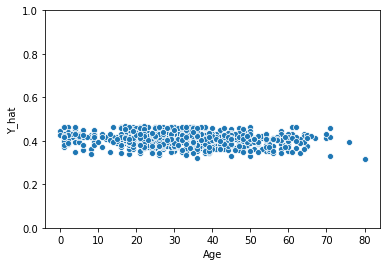

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.scatterplot(x = "Age", y = "Y_hat", data = prob)
plt.ylim(0,1)

# Concordance and Discordance Statistics

In [20]:
def get_concordance_discordance(data,outcome): 
    
    prob_0 = data[outcome == 0].reset_index().drop(['index'], axis = 1)
    prob_1 = data[outcome == 1].reset_index().drop(['index'], axis = 1)
    
    from bisect import bisect_left, bisect_right
    zeros_list = sorted([prob_0.iloc[j,1] for j in prob_0.index])
    
    zeros_length = len(zeros_list)
    disc = 0
    ties = 0
    conc = 0    
    
    for i in prob_1.index:
        cur_conc = bisect_left(zeros_list, prob_1.iloc[i,1])
        cur_ties = bisect_right(zeros_list, prob_1.iloc[i,1]) - cur_conc   
        conc += cur_conc
        ties += cur_ties
    pairs_tested = zeros_length * len(prob_1.index)
    disc = pairs_tested - conc - ties
    
    print("Pairs = ", pairs_tested)
    print("Conc = ", conc)
    print("Disc = ", disc)
    print("Tied = ", ties)
    
    concordance = round(conc/pairs_tested,2)
    discordance = round(disc/pairs_tested,2)
    ties_perc = round(ties/pairs_tested,2)
    
    print("Concordance = ", concordance*100, "%")
    print("Discordance = ", discordance*100, "%")
    print("Tied = ", ties_perc, "%")
    
    return

con_disc_data = pd.merge(y_hat,titanic[["observation","Survived"]])

get_concordance_discordance(con_disc_data,con_disc_data["Survived"])

Pairs =  267445
Conc =  93674
Disc =  173771
Tied =  0
Concordance =  35.0 %
Discordance =  65.0 %
Tied =  0.0 %


# Logistic Regression Model with categorical predictors

In [22]:
titanic_dummy = pd.get_dummies(titanic, columns = ['Gender', 'Class'])
logit_model_dummy = smf.logit(formula = 'Survived ~ Age + Gender_female + Class_1 + Class_2', data = titanic_dummy).fit()
logit_model_dummy.summary()

Optimization terminated successfully.
         Current function value: 0.469558
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1041
Method:                           MLE   Df Model:                            4
Date:                Sat, 03 Jul 2021   Pseudo R-squ.:                  0.3056
Time:                        11:59:30   Log-Likelihood:                -491.16
converged:                       True   LL-Null:                       -707.31
Covariance Type:            nonrobust   LLR p-value:                 2.903e-92
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2628      0.203     -6.222      0.000      -1.661      -0.865
Age              -0.0345      0.006     -5.443      0.000      -0.047      -0.022
Gender_female     2.4976      0.166     15.041      0.000       2.172       2.823
Class_1           2.2907      0.226     10.143      0.000       1.848       2.733
Class_2           1.0093      0.198      5.088      0.000       0.620       1.398
=================================================================================
"""

In [8]:
pd.DataFrame(np.exp(logit_model_dummy.params), columns = ["Odds Ratio"])[1:]

,Odds Ratio
Age,0.966113
Gender_female,12.153021
Class_1,9.881668
Class_2,2.743693


# Logistic Regression Model with Interaction Terms

In [9]:
logit_model_dummy = smf.logit(formula = 'Survived ~ Age + Gender_female + Class_1 + Class_2 + Gender_female*Class_1 + Gender_female*Class_2', data = titanic_dummy).fit()
logit_model_dummy.summary()

Optimization terminated successfully.
         Current function value: 0.445426
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1039
Method:                           MLE   Df Model:                            6
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.3413
Time:                        09:11:46   Log-Likelihood:                -465.92
converged:                       True   LL-Null:                       -707.31
Covariance Type:            nonrobust   LLR p-value:                4.284e-101
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.6552      0.211     -3.101      0.002      -1.069      -0.241
Age                      -0.0385      0.007     -5.707      0.000      -0.052      -0.025
Gender_female             1.3970      0.221      6.329      0.000       0.964       1.830
Class_1                   1.5770      0.253      6.245      0.000       1.082       2.072
Class_2                  -0.0242      0.272     -0.089      0.929      -0.557       0.509
Gender_female:Class_1     2.4894      0.540      4.607      0.000       1.430       3.548
Gender_female:Class_2     2.5599      0.456      5.612      0.000       1.666       3.454
=========================================================================================
"""

In [10]:
pd.DataFrame(np.exp(logit_model_dummy.params), columns = ["Odds Ratio"])[1:]

,Odds Ratio
Age,0.962242
Gender_female,4.042977
Class_1,4.840540
Class_2,0.976136
Gender_female:Class_1,12.054483
Gender_female:Class_2,12.934729


In [27]:
print(logit_model_dummy.aic)
print(logit_model.aic)

992.3152461198325
1415.3013679488658
